In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Spotify Most Streamed Songs.csv')

# Exploring the Spotify csv file

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Checking if there any Nan data

In [7]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

# Droping key columns Nan

In [8]:
df.dropna(subset= 'key', inplace= True)

# Fixing in_shazam_charts column since it contains str data and numeric in the same column

In [18]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',', ''), errors='coerce')

# Checking in_shazam_charts box plot to see if there any outlers

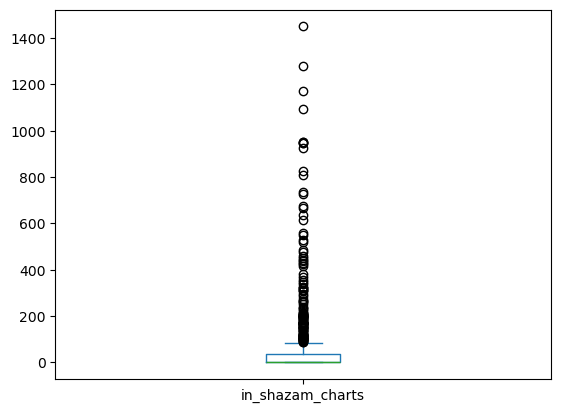

In [201]:
df['in_shazam_charts'].plot(kind='box');

# Fixing Nan issue occurs after cleaned in_shazam_charts from str and falling Na with in_shazam_charts Median 

In [24]:
Mdian_in_shazam_charts = df['in_shazam_charts'].median()
df['in_deezer_playlists'] = df['in_shazam_charts'].fillna(Mdian_in_shazam_charts)

# Fixing in_deezer_playlists column since it contains str data and numeric in the same column

In [125]:
df['in_deezer_playlists']=  pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''), errors='coerce')

# Fixing released_year column format

In [225]:
df['released_year'] = pd.to_datetime(df.released_year)

# Checking if data cleaned 

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            857 non-null    object        
 1   artist(s)_name        857 non-null    object        
 2   artist_count          857 non-null    int64         
 3   released_year         857 non-null    datetime64[ns]
 4   released_month        857 non-null    int64         
 5   released_day          857 non-null    int64         
 6   in_spotify_playlists  857 non-null    int64         
 7   in_spotify_charts     857 non-null    int64         
 8   streams               857 non-null    float64       
 9   in_apple_playlists    857 non-null    int64         
 10  in_apple_charts       857 non-null    int64         
 11  in_deezer_playlists   857 non-null    int64         
 12  in_deezer_charts      857 non-null    int64         
 13  in_shazam_charts      857

In [204]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,1.551925,2018.297550,6.031505,13.739790,5204.997666,11.959160,5.133554e+08,67.383897,51.044341,395.284714,2.619603,55.009335,122.842474,67.273046,51.219370,64.339557,26.644107,1.611435,18.175029,10.396733
std,0.864634,10.991135,3.567138,9.287652,7944.032885,19.194211,5.714855e+08,86.562405,50.407409,1153.124378,5.770938,150.345490,28.196567,14.653159,23.594579,16.056348,25.688111,8.570734,13.569471,10.090890
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,5.000000,859.000000,0.000000,1.391938e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2226.000000,3.000000,2.849083e+08,34.000000,38.000000,43.000000,0.000000,3.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,85.000000,85.000000,164.000000,2.000000,35.000000,142.000000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,46.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


 # EDA Spotify csv file

# Most five artists have songs in spotifiy

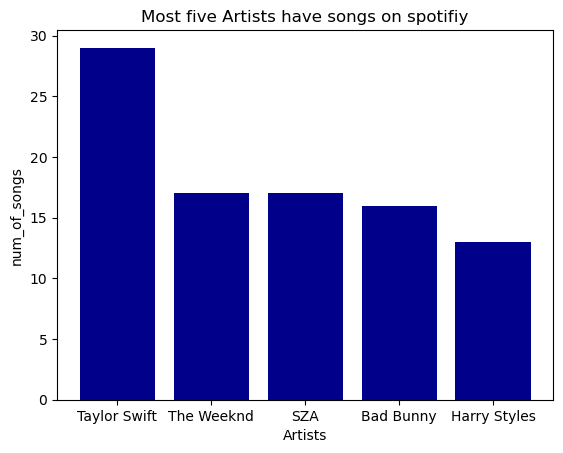

In [167]:
songs_count_by_artisit = df['artist(s)_name'].value_counts().sort_values(ascending=False).head(5)
x = songs_count_by_artisit.index
y = songs_count_by_artisit.values
plt.xlabel('Artists')
plt.ylabel('num_of_songs')
plt.title('Most five Artists have songs on spotifiy')
plt.bar(x, y, color = 'darkblue');

# top 5 years songs released

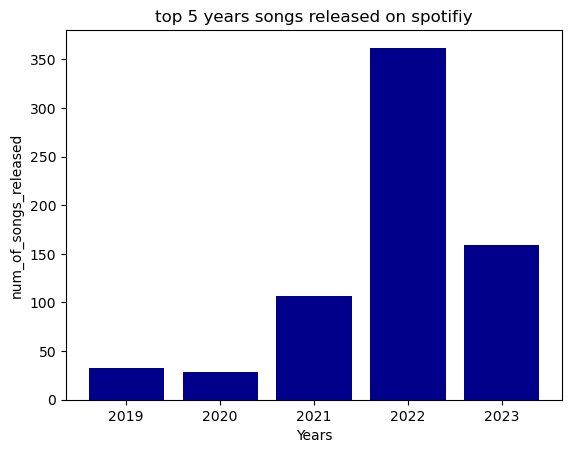

In [170]:
songs_count_by_yeear = df['released_year'].value_counts().sort_values(ascending=False).head(5)
x = songs_count_by_yeear.index
y = songs_count_by_yeear.values
plt.xlabel('Years')
plt.ylabel('num_of_songs_released')
plt.title('top 5 years songs released on spotifiy')
plt.bar(x, y, color = 'darkblue');

# Defining function because we'll repeat some ploting Methodology

In [198]:
def plot_most_10(str1, str2):
    most_ten =  df.sort_values(str1, ascending= False).head(10)
    x = most_ten[str2]
    y = most_ten[str1]
    plt.xticks(rotation = 45, ha='right')
    plt.xlabel(str2)
    plt.ylabel(str1)
    plt.title(f'most {str2}  {str1}')
    plt.bar(x, y, color = 'darkblue');
    return plt.show()

# what's the most 10 tracks streamed

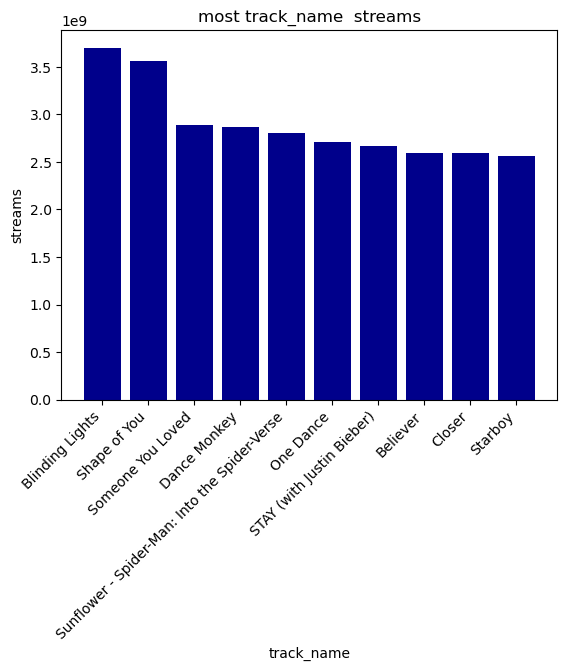

In [199]:
plot_most_10('streams', 'track_name')

# what's the most 10 track in_spotify_playlists ?


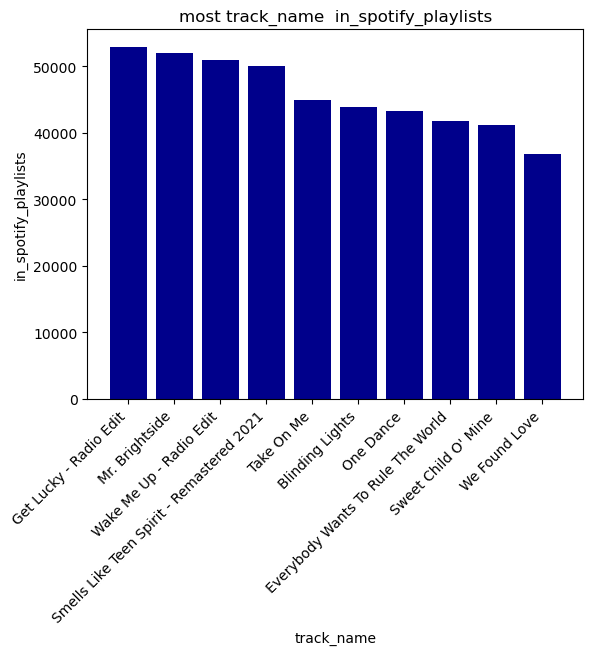

In [200]:
plot_most_10('in_spotify_playlists', 'track_name')

# what's the most 10 track in_spotify_charts ?

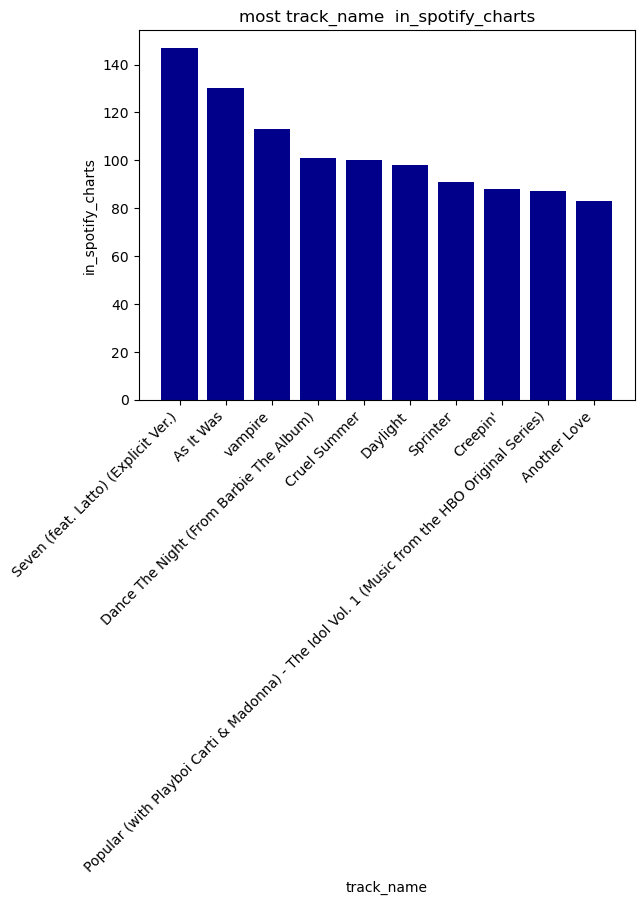

In [172]:
plot_most_10('in_spotify_charts', 'track_name')

# what's the most 10 track in_apple_playlists ?

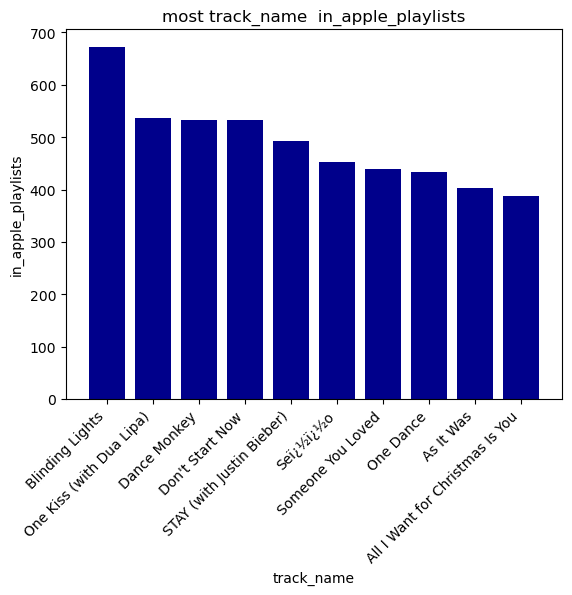

In [122]:
plot_most_10('in_apple_playlists', 'track_name')

# what's the most 10 track in_apple_charts ?

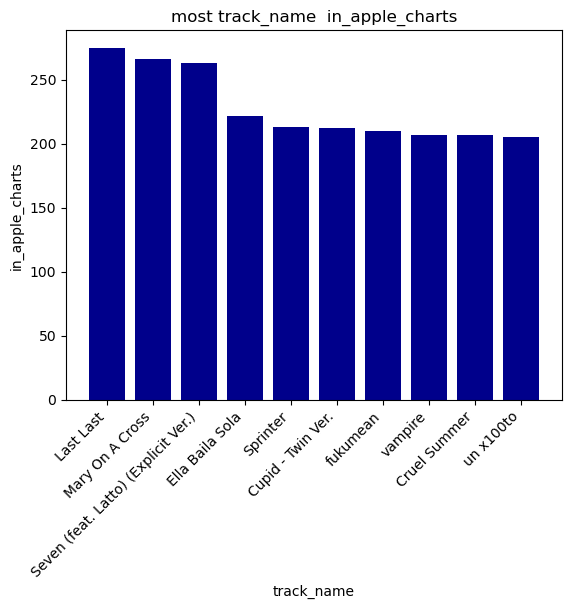

In [123]:
plot_most_10('in_apple_charts', 'track_name')

# what's the most 10 track in_deezer_playlists ?

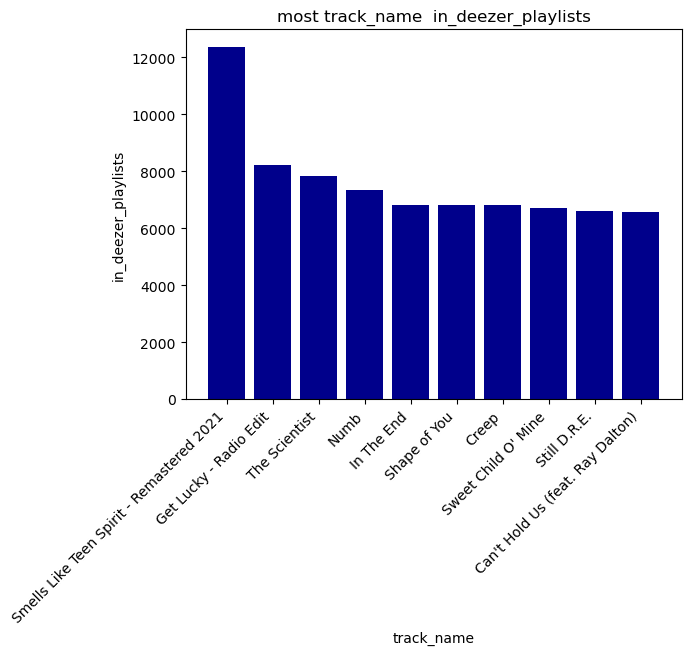

In [127]:
plot_most_10('in_deezer_playlists', 'track_name')

# what's the most 10 track in_deezer_charts   ?

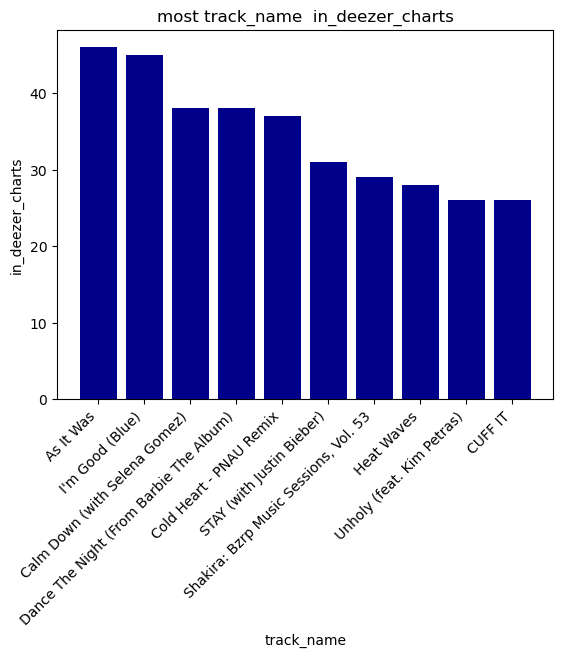

In [128]:
plot_most_10('in_deezer_charts', 'track_name')

# what's the most 10 track in_deezer_charts ?

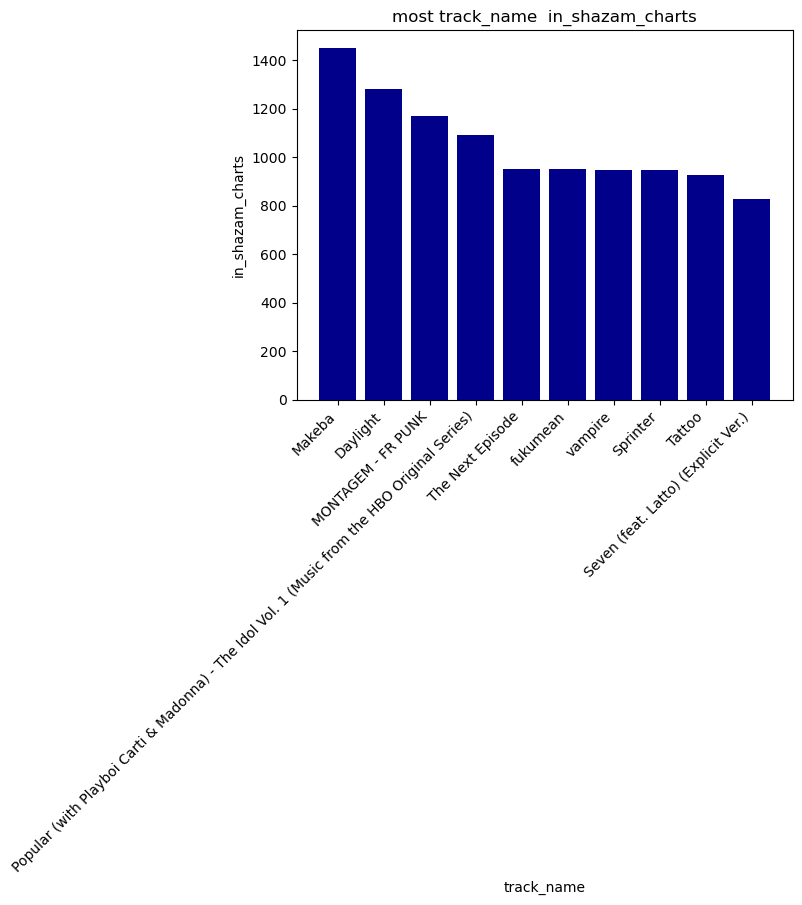

In [130]:
plot_most_10('in_shazam_charts', 'track_name')

# streams by Mode (Major,Minor)

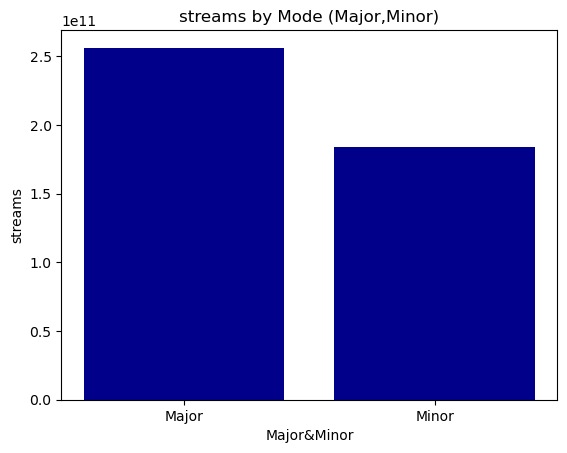

In [224]:
grp_mode_streams = df.groupby('mode')['streams'].sum()
x = n.index
y = n.values
plt.xlabel('Major&Minor')
plt.ylabel('streams')
plt.title('streams by Mode (Major,Minor)')
plt.bar(x, y, color = 'darkblue');
